In [8]:
import numpy as np
import pandas as pd
import mplfinance as mpf
import yfinance as yf
import statistics as st
from pandas_datareader import data as pdr
import datetime as dt
%matplotlib inline 

In [9]:
#EURUSD=X, USDJPY=X, GBPUSD=X, AUDNZD=X
#Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
#Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
data = yf.download(tickers = "EURUSD=X", period = "10d", interval = "1h", group_by = 'ticker', auto_adjust = True,
                   prepost = True, threads = True, proxy = None)

[*********************100%***********************]  1 of 1 completed


In [10]:
# Function to calculate average true range
def ATR(DF, n):
  df = DF.copy() # making copy of the original dataframe
  df['H-L'] = abs(df['High'] - df['Low']) 
  df['H-PC'] = abs(df['High'] - df['Close'].shift(1))# high -previous close
  df['L-PC'] = abs(df['Low'] - df['Close'].shift(1)) #low - previous close
  df['TR'] = df[['H-L','H-PC','L-PC']].max(axis =1, skipna = False) # True range
  df['ATR'] = df['TR'].rolling(n).mean() # average –true range
  df = df.drop(['H-L','H-PC','L-PC'], axis =1) # dropping the unneccesary columns
  df.dropna(inplace = True) # droping null items
  return df

In [11]:
print(ATR(data, 14))

                               Open      High       Low     Close  Volume  \
2022-09-21 14:00:00+01:00  0.991572  0.991867  0.990295  0.990884       0   
2022-09-21 15:00:00+01:00  0.991178  0.991277  0.988240  0.988240       0   
2022-09-21 16:00:00+01:00  0.988045  0.988826  0.986972  0.988045       0   
2022-09-21 17:00:00+01:00  0.987752  0.988631  0.987069  0.987167       0   
2022-09-21 18:00:00+01:00  0.987362  0.988924  0.986972  0.987849       0   
...                             ...       ...       ...       ...     ...   
2022-10-04 10:00:00+01:00  0.987752  0.988631  0.985707  0.988240       0   
2022-10-04 11:00:00+01:00  0.988338  0.990589  0.988045  0.989511       0   
2022-10-04 12:00:00+01:00  0.989511  0.989903  0.988240  0.989022       0   
2022-10-04 13:00:00+01:00  0.989120  0.989903  0.989120  0.989903       0   
2022-10-04 13:09:22+01:00  0.989218  0.989218  0.989218  0.989218       0   

                                 TR       ATR  
2022-09-21 14:00:00+01:00  

C:\Users\Kazem Kamrani\anaconda3\lib\site-packages\mplfinance\plotting.py:648: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


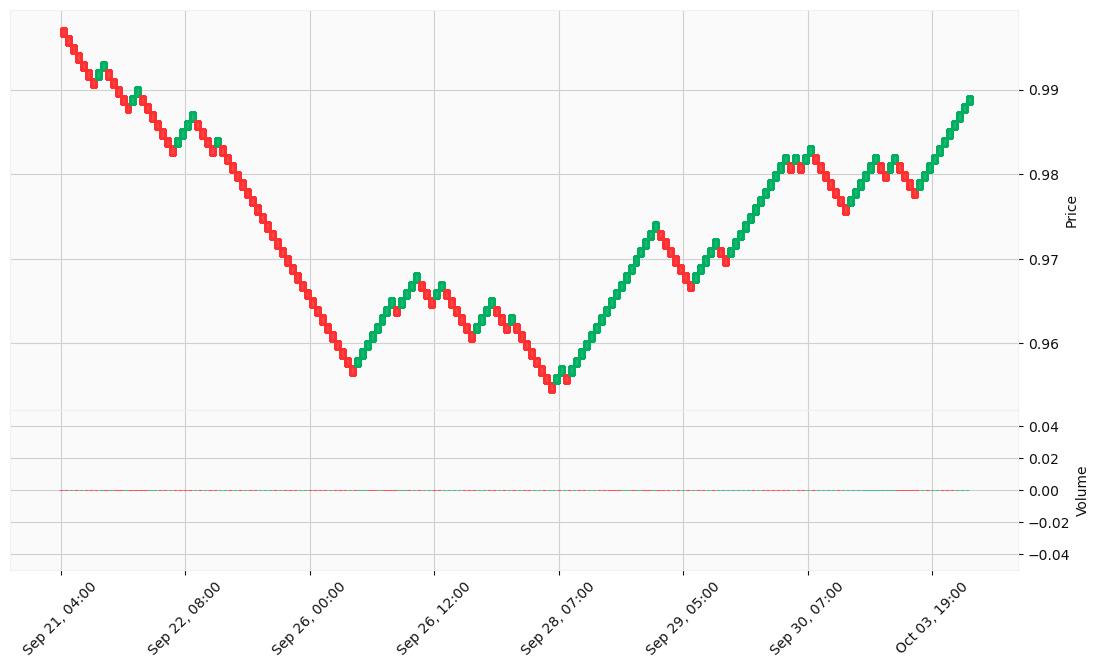

In [12]:
mpf.plot(data,type="renko", volume = True, style = 'yahoo' , renko_params = dict(brick_size =0.0010) , 
        figsize=(14,8))

C:\Users\Kazem Kamrani\anaconda3\lib\site-packages\mplfinance\plotting.py:648: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


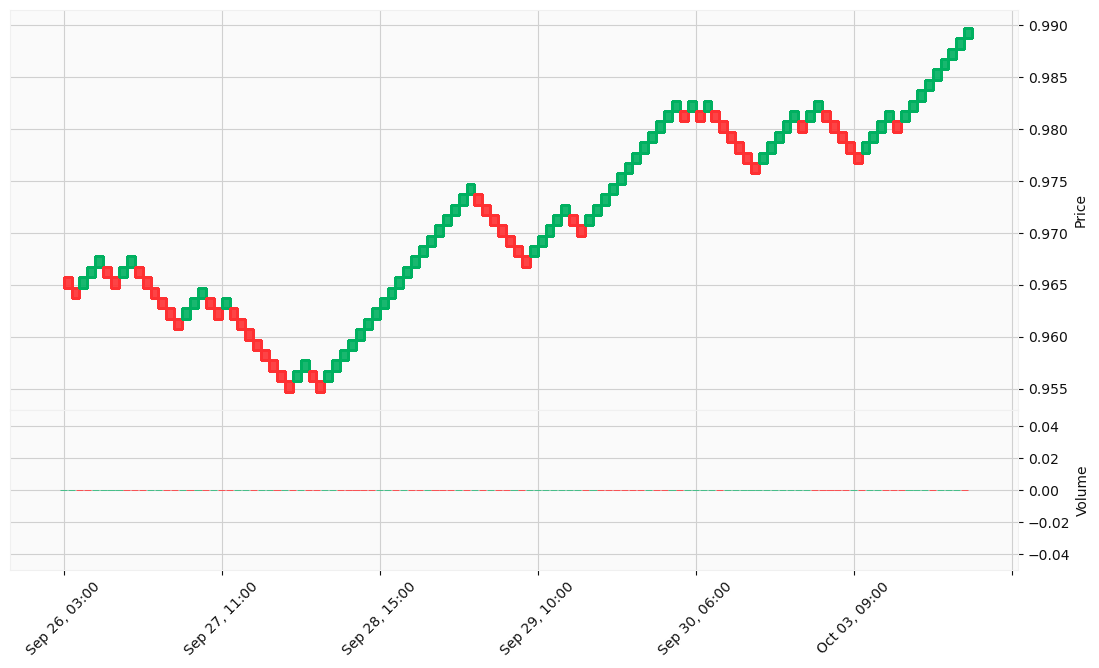

In [14]:
data1 = data.loc["2022-09-26 00:00:01+00:00":]
mpf.plot(data1,type="renko", volume = True, style = 'yahoo' , renko_params = dict(brick_size =0.0010) , 
        figsize=(14,8))

C:\Users\Kazem Kamrani\anaconda3\lib\site-packages\mplfinance\plotting.py:648: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


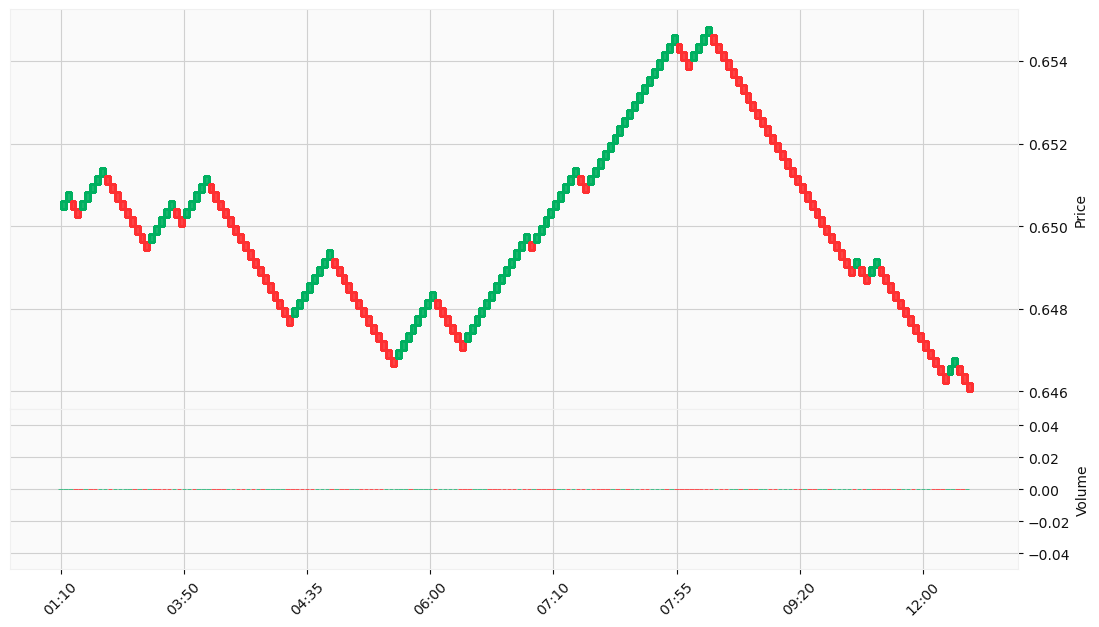

In [7]:
data2 = data.loc["2022-10-04 00:00:01+00:00":]
mpf.plot(data2,type="renko", volume = True, style = 'yahoo' , renko_params = dict(brick_size =0.0010) , 
        figsize=(14,8))